In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import numpy as np
import random
import os

# Definimos la semilla para reproducibilidad
seed = 63
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(seed)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostramos las etiquetas de los datos
print('Etiquetas de los datos de entrenamiento:', y_train)

Etiquetas de los datos de entrenamiento: [5 0 4 ... 5 6 8]


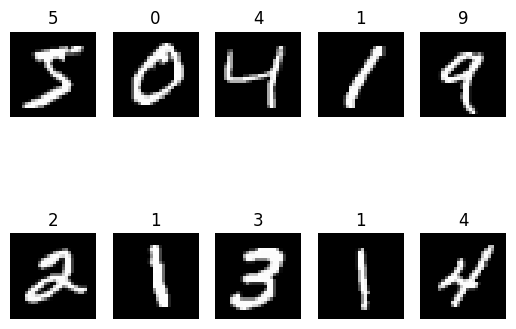

Dimensiones de los datos de entrenamiento: (60000, 28, 28)
Numero de clases: 10


In [3]:
# Mostramos los datos de los primeros 10 dígitos
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

# Mostramos las dimensiones de los datos
print('Dimensiones de los datos de entrenamiento:', x_train.shape)
print('Numero de clases:', len(set(y_train)))

Creamos modelo

In [7]:
# Creamos el modelo de red neuronal
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(50, activation='tanh', kernel_initializer = 'ones', bias_initializer = 'ones'),
  keras.layers.Dense(54, activation='tanh', kernel_initializer = 'ones', bias_initializer = 'ones'),
  keras.layers.Dense(10, activation='softmax')
])

""" 
  layers.Dense(
        units=50, 
        activation='relu', 
        use_bias=True, 
        kernel_initializer='he_normal', 
        bias_initializer='zeros', 
        kernel_regularizer=regularizers.l2(0.01), 
        bias_regularizer=regularizers.l2(0.01), 
        activity_regularizer=regularizers.l2(0.01), 
        kernel_constraint=constraints.max_norm(2.0), 
        bias_constraint=constraints.max_norm(2.0)
    )
"""

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

params = {
  'batch_size': 32,
  'validation_data': (x_test, y_test),
  'epochs': 5
}

# Entrenamos el modelo
model.fit(x_train, y_train, **params)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 575us/step - accuracy: 0.1027 - loss: 2.3297 - val_accuracy: 0.1010 - val_loss: 2.3065
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.1041 - loss: 2.3081 - val_accuracy: 0.1010 - val_loss: 2.3065
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.1040 - loss: 2.3081 - val_accuracy: 0.1010 - val_loss: 2.3065
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.1040 - loss: 2.3081 - val_accuracy: 0.1010 - val_loss: 2.3065
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.1040 - loss: 2.3081 - val_accuracy: 0.1010 - val_loss: 2.3065


In [8]:
# Evaluamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nPrecisión en los datos de prueba:', test_acc)
print('Error en los datos de prueba:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.1009 - loss: 2.3058

Precisión en los datos de prueba: 0.10100000351667404
Error en los datos de prueba: 2.3065052032470703


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


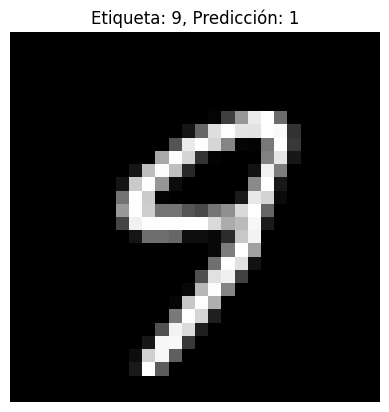

In [6]:
# Hacemos predicciones aleatorias
predictions = model.predict(x_test)
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]
random_prediction = np.argmax(predictions[random_index])

plt.imshow(random_image, cmap='gray')
plt.title(f'Etiqueta: {random_label}, Predicción: {random_prediction}')
plt.axis('off')
plt.show()